# Baseline Model

### **Step by Step**

### 1. Data Loading

We import all the necessary libraries for load the dataset with the data.

In [2]:
import pandas as pd

We merge all the data of the three datasets (imdb, amazon and yelp) in only one called ```raw_data.xslx``` and we put this information in Excel format for more comfortable. Each dataset have 1000 rows, so the amount of the raw_text file has 3000 rows.

In [3]:
df = pd.read_excel('../data/raw_data.xlsx', sheet_name='raw_data', header=0)
df.shape

(3000, 2)

In [4]:
y = df['y']

### 2. Creating the model

For create the model of Dummy Classifier, we import the sklearn library

In [5]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

### Data Preprocessing

In [6]:
df.drop(columns=['y'], inplace=True)

### Split Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)


### Model Evaluation

In [8]:
strategies = ['most_frequent', 'prior', 'stratified', 'uniform', 'constant']
data = {}
for strategy in strategies:
    if strategy == 'constant':
        dummy = DummyClassifier(strategy=strategy, constant=1)
    else:
        dummy = DummyClassifier(strategy=strategy)

    dummy.fit(X_train, y_train)
    y_pred = dummy.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)

    data[strategy] = {
        'accuracy': accuracy,
        **report['weighted avg']
    }


## Results

In [9]:
df = pd.DataFrame(data).T
print(df.round(3))

               accuracy  precision  recall  f1-score  support
most_frequent     0.499      0.249   0.499     0.332    900.0
prior             0.499      0.249   0.499     0.332    900.0
stratified        0.500      0.500   0.500     0.500    900.0
uniform           0.507      0.507   0.507     0.506    900.0
constant          0.501      0.251   0.501     0.335    900.0


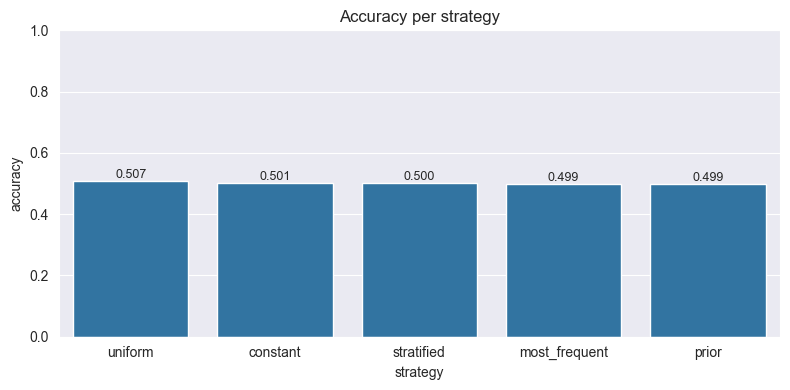

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = df.reset_index().rename(columns={'index': 'strategy'})
plot_df = plot_df.sort_values('accuracy', ascending=False)

plt.figure(figsize=(8,4))
ax = sns.barplot(data=plot_df, x='strategy', y='accuracy', errorbar=None)
ax.set_title('Accuracy per strategy')
ax.set_ylim(0, 1)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()
